# Supervised Learning with Tensorflow and Deep Neural Networks
*Written by Olov Andersson. Some bits are borrowed from the official Tensorflow tutorials. This lab requires Firefox or Chrome.*
<br/><br/>

Recall that in *supervised learning* we aim to learn an unknown function y = f(x), from examples of inputs x and outputs y. When y is a discrete label, this is called *classification*, and when it is a real number it is *regression*. The inputs x and outputs y can in theory be anything encoded as an array of numbers, e.g. the pixels of an image, letters in a text, or waveforms in a sound. See the lecture material on supervised and reinforcement learning for more information.

The purpose of this lab is to give you some hands-on experience with Google Tensorflow and deep neural networks, which currently are *very popular* due to their good performance on big data sets  and efficient training. A big factor in the success of deep learning is the rise of convenient software frameworks such as Tensorflow (Google) and PyTorch (Facebook), which automatically do the messy gradient calculations needed for training, and can do this efficiently on Graphics Processing Units (GPUs, commonly used in graphics cards).

This lab is more like a tutorial, with only three questions for you to answer along the way. Make sure to do the basics first before attempting the questions. Please write a short lab report with answers to the three questions below to your lab assistant.

Since Tensorflow is both a complex piece of software and requires quite a bit of computation, this lab uses Google Colab, which freely provides a web-based front-end to Python+Tensorflow and some free computational resources, including GPUs. You can either run this notebook without saving the results, or you can create a copy via File->Save a Copy in Drive. Note that you may need a (free) Google account to run this notebook, so you may want to create one. It is also possible to run colab with your own local notebook [backend](https://research.google.com/colaboratory/local-runtimes.html) and [Tensorflow](https://www.tensorflow.org/install/pip), but this is rather complicated and not recommended.

NOTE: If the virtual machine backend ends up in a broken state for some reason (e.g. crash), you can click Runtime->Restart runtime and re-run the appropriate setup code for that section of the lab.

## Part 1) Tensorflow Basics
Much has already been written on the web on how to apply Tensorflow to different problems. Compared to these, this lab additionally attempts to give you a *general understanding* of how the machine learning in the Tensorflow framework actually works under the hood. For more tutorials, see the official tensorflow site: https://www.tensorflow.org/tutorials.


### Why Tensors?
A tensor is in this context simply a multi-dimensional array. A regular vector is an array with only one dimension, a matrix typically two dimensions (rows, columns), while tensors generalize this to arbitrary dimensions. An example is an image with standard RGB (Red Green Blue) values for each pixel, it is a tensor with three dimensions, height x width x 3, where the last dimension are the R,G,B values. If we additionally have N images in our training set, we get a 4-dimensional tensor (height x width x 3 x N). Mathematical operations can then be defined directly on tensors, for example by adding or multiplying them together.

Besides the mathematical convenience, operations on tensors can be efficiently calculated using GPUs. GPUs effectively contain thousands of execution threads that can work in parallell on different parts of the tensor.

### Why Tensorflow?
The name stems from *tensor* and *data flow* language. This basically means a language that defines a directed graph of mathematical operations. For example, to compute y = 3*x^2 we may define it as the computation graph below.
<center>
<img src="https://docs.google.com/uc?export=download&id=1ld_fSBaqcpP2xU8CW9olX362gbfDLi6N" width="100">
</center>

Tensorflow allows you to easily build such *computation graphs* of tensors, and then compute them efficiently on a GPU. Further, it can *automatically differentiate* such computation graphs with regard to variables in it, such as your model parameters. This is used to efficiently compute the parameter gradients needed for training them, all on the GPU. The Autograd tool used in the code example of the first ML lecture also works similarly for regular Python NumPy code. However, that runs on the CPU and does not scale to large real-world problems.

### Your First Computation Graph

Run the code snippet below by clicking in the box and pressing the play button that shows up on the top left side. This will construct the computation graph pictured above. Note that the result is not actually computed yet, to do this you have to tell Tensorflow to compute the node y below.



In [ ]:
########## Setup ############
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow.compat.v1 as tf

tf.disable_eager_execution()
#############################

x = tf.constant(2.0)  # Assign x the value constant 2.0
print('x is:', x)  # Note how this just returns a reference to the graph node of x, not it's value.

x = tf.pow(x,2)  # power of 2, that is ^2
print('x^2 is', x)  # This just returns a reference to a computation node for computing x^2, it is *not actually computed yet*

y = 3*x
print('y is:', y)  # This just returns a reference to the computation node for multiplying the result with 3, mirroring the graph above. It is still not computed.


x is: Tensor("Const:0", shape=(), dtype=float32)
x^2 is Tensor("Pow:0", shape=(), dtype=float32)
y is: Tensor("mul:0", shape=(), dtype=float32)


In [ ]:
print(tf.Session().run(y))

12.0


As you can see, it now computed 3*2^2 = 12. While entirely transparent to you, it did this by taking your computation graph and running it on a server, probably somewhere in California.

### Tensorflow 2.0 and Eager Execution
Since manually running your graph makes development difficult, with Tensorflow 2.0 they are moving towards an "eager execution" setting where the graph is constructed and executed automatically under the hood when you query it, allowing tensorflow code to work more like normal computation. We will use this for the remainder of the lab. To use this **you need to restart Tensorflow: Click Runtime -> Restart runtime, and then run the Setup snippet below. You will need to re-run the setup everytime you restart your browser while on Parts 1 and 2**.

### Setup for the Rest of Part 1) and 2)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow.compat.v1 as tf

tf.enable_eager_execution()

Then try the code below:

In [ ]:
y = 3*tf.pow(2.0, 2) # This now directly computes the value 12.0
print(y)

tf.Tensor(12.0, shape=(), dtype=float32)


### Exploring Tensors
Tensors are simply N-dimensional arrays of arbitrary size

In [ ]:
x = tf.constant(2.0, shape=[2,2]) # This is a 2-by-2 tensor
print('x:', x)

y = tf.constant(2.0, shape=[2,2,2]) # This is a 2-by-2-by-2 tensor
print('y:', y)

z = tf.constant(2.0, shape=[2,3,4,5]) # 4D+ arrays are difficult to visualize, but you get the idea...
print('z:', z)

x: tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
y: tf.Tensor(
[[[2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]]], shape=(2, 2, 2), dtype=float32)
z: tf.Tensor(
[[[[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]

  [[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]

  [[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]]


 [[[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]

  [[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]

  [[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]]], shape=(2, 3, 4, 5), dtype=float32)


Tensors have to have the same number of dimensions to make mathematical operations on them

In [ ]:
temp = tf.constant(2.0, shape=[2,2]) * tf.constant(4.0, shape=[2,2,2])  # This will not work


In [ ]:
tf.constant(2.0, shape=[2,2]) * tf.constant(4.0, shape=[2,2])  # This will work, same size

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

In [ ]:
tf.constant(2.0, shape=[2,2]) * tf.constant(4.0, shape=[2,3])  # This will not work, same number of dimensions, but they are different sizes

However, tensor dimensions that are size 1 will be automatically duplicated to match the other tensor, a concept known as "broadcasting". This is a common technique, and can basically be seen as a generalization of multiplying a regular [n,m] matrix with a size [1] scalar number. It is not important for this lab, but the curious student can read https://www.tensorflow.org/xla/broadcasting

In [ ]:
tf.constant(2.0, shape=[2,2]) * tf.constant(4.0, shape=[2,1])  # This will, same number of dimensions, and broadcasting will duplicate the second one to make it 2-by-2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

### Variables
So far we have constructed computation graphs only from tf.constant()'s.

However, in machine learning we want to update the parameters of the model without reconstructing the computation graph. For example, we may have a linear model y = p1\*x+p0, where p1 is the line slope and p0 its intercept. Both are parameters trained from data. Big neural network models have millions or even billions of parameters, and we want to update these on the GPU. We can do this by defining them as a tf.Variable()


In [ ]:
x = tf.Variable([[1.6]])
print(x)

tf.assign(x, x + 3)  # Efficiently updates variable with x = x + 3
print(x)

x = x + 3  # Just overwrites variable with a regular Tensor
print(x)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.6]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[4.6]], dtype=float32)>
tf.Tensor([[7.6]], shape=(1, 1), dtype=float32)


### Automatic Differentiation for Gradient Descent

To optimize (train) parameters in machine learning models, we typically use gradient descent (see first ML lecture). This requires computing the gradients of a loss function with regard to the parameters. The real benefit of Tensorflow is that it can also efficiently compute gradients of variables in its computation graphs via a generalization of the backpropagation algorithm. A basic way of doing this is via its "*gradient tape*". This tape records all the mathematical operations you do inside the scope of the tape, and can then automatically differentiate the result with regard to the desired variable (e.g. your model parameters).

Below we show a simple example of using this to compute the gradient of the function y = x^2 with regard to x. Note that the true analytical gradient is 2*x (compare to below).

Then we do gradient descent to find the minium of this function (which is at x=0) via gradient descent by *subtracting* the calculated gradient in each step (remember, the gradient of a function points in the direction of fastest *increase*, while the negative gradient is the direction of fastest decrease).

In [ ]:
x = tf.Variable(3.0)
tf.print('initial x:', x)  # tf.print hides extra type info (Tensor/Variable...)
for i in range(15):
  with tf.GradientTape() as tape:  # Records tensor operations for later derivation
    y = x * x  # Defines tensorflow node y as a function of x
  dy_dx = tape.gradient(y, x)  # Compute the gradient (partial derivative) of the function y(x) with regard to x
  tf.assign(x, x - 0.2 * dy_dx)  # Do gradient descent with learning rate 0.2 (see first ML lecture)
  tf.print('new x:', x, '( gradient (dy_dx) used:', dy_dx, ')')

initial x: 3
new x: 1.8 ( gradient (dy_dx) used: 6 )
new x: 1.07999992 ( gradient (dy_dx) used: 3.6 )
new x: 0.647999942 ( gradient (dy_dx) used: 2.15999985 )
new x: 0.388799965 ( gradient (dy_dx) used: 1.29599988 )
new x: 0.233279973 ( gradient (dy_dx) used: 0.777599931 )
new x: 0.139967978 ( gradient (dy_dx) used: 0.466559947 )
new x: 0.0839807838 ( gradient (dy_dx) used: 0.279935956 )
new x: 0.0503884703 ( gradient (dy_dx) used: 0.167961568 )
new x: 0.0302330814 ( gradient (dy_dx) used: 0.100776941 )
new x: 0.0181398485 ( gradient (dy_dx) used: 0.0604661629 )
new x: 0.0108839087 ( gradient (dy_dx) used: 0.036279697 )
new x: 0.00653034495 ( gradient (dy_dx) used: 0.0217678174 )
new x: 0.00391820725 ( gradient (dy_dx) used: 0.0130606899 )
new x: 0.0023509243 ( gradient (dy_dx) used: 0.0078364145 )
new x: 0.00141055463 ( gradient (dy_dx) used: 0.00470184861 )


## Part 2) Using Tensorflow to Train Machine Learning Models
In this part the fundamentals come together to train your first model, simple 1D linear regression. This is a Tensorflow-version of the code example from the first ML lecture (feel free to compare).

Note that we first select a model, then use this to define a loss function against the training data. This can then be automatically differentiated using Tensorflow.



In [ ]:

# Build a toy dataset of 10 examples, 1D real-number input x
examples_x = tf.constant([2.02, 0.19, 2.9,  1.02, 0.35, 4.39, 0.15, 2.53, 3.07, 0.05])  # Using tf instead of numpy
print('Input examples x:', examples_x)

# ...and real-number output y
examples_y = tf.constant([27.07, 19.91, 26.18, 23.48, 19.22, 32.51, 20.11, 28.93, 28.29, 20.01])
print('Output examples y:', examples_y)

# Choose model as y = x*p1 + p0, linear regression where p1 is slope and p0 intercept
def model(inputs_x, parameters):  # Note that inputs_x is a vector (1D tensor) of x examples, and
  return inputs_x*parameters[1] + parameters[0]  # It returns a vector of corresponding y predictions

# Loss function for linear regression, given a choice parameters
def training_loss(parameters):
    # Calculate predicted output for examples with current parameters
    pred_y = model(examples_x, parameters)
    # With loss function as sum square difference against y examples
    return tf.reduce_sum(tf.square(examples_y-pred_y))  # Sum square loss

# Initialize parameters to 0 by creating a tf.Variable node
parameters = tf.Variable([0.0, 0.0])

Input examples x: tf.Tensor([2.02 0.19 2.9  1.02 0.35 4.39 0.15 2.53 3.07 0.05], shape=(10,), dtype=float32)
Output examples y: tf.Tensor([27.07 19.91 26.18 23.48 19.22 32.51 20.11 28.93 28.29 20.01], shape=(10,), dtype=float32)


### Train and Plot Result (run several times for more training)
The code below will train the model above using gradient descent, doing 10 parameter updates for each time you press play. However, it is missing a crucial part.

**Question 1)** *In the gradient descent learning code below, please complete the gradient computation by inputing the correct variables where there are question marks. We are using Tensorflow to automatically compute the gradient with GradientTape (tape) similar to how you were taught above, but to do supervised learning which tensorflow node do we compute the gradient of, and with regard to which variable? Please fill this in below (and in your lab report). If you get stuck, the slides on training models in the first ML lecture might be helpful.*


Loss before training: 6234.28564
Loss after training: 248.048981
Parameters of linear model after training (intercept, slope): [12.2778835 5.68694258]


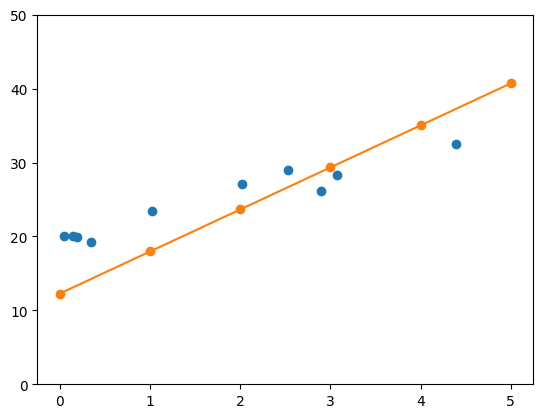

In [ ]:
tf.print("Loss before training:", training_loss(parameters))

for i in range(10):  # Adjust number of iterations as desired
  # Compute loss and optimize parameters using gradient descent
  with tf.GradientTape() as tape:  # Records tensor operations so it can be used for later derivation (gradients)
    loss = training_loss(parameters)  # Defines tensorflow node 'loss' as a function of...

  gradient = tape.gradient(loss, parameters)  # QUESTION 1) Replace the question marks with the correct tensorflow nodes

  tf.assign(parameters, parameters - 0.01 * gradient)

tf.print("Loss after training:", training_loss(parameters))
tf.print("Parameters of linear model after training (intercept, slope):", parameters)

# Plotting
test_x = range(6) # Test inputs for x=0..6
test_y = model(test_x, parameters)  # Ask trained model for predictions
# Plot (NOTE: line comes from linear model assumption)
import matplotlib.pyplot as plt
_ = plt.plot(examples_x, examples_y, 'o', test_x, test_y, 'o-')
_ = plt.ylim([0,50])


## Part 3) Train Neural Networks using Keras layers
While we have now defined and trained a linear model with two parameters, a modern deep neural network contains millions of parameters over many layers with different types of neurons.  

"Keras" is a standard abstraction layer for deep learning that allows you define and train network models in a more compact form. It uses the same basic graph machinery as we just learned above, but spares us having to explicitly define each operation. Here we will illustrate how to use Keras to simplify neural network training. We will do image recognition on the "Fashion MNIST" data set, a set of product images from the clothing retailer Zalando.

Run the code below to set up Tensorflow and load the data set of 60 000 Zalando product images (28x28 pixels in grayscale). You can skip down to the loading the images. It also contains the correct output labels for 9 classes of clothing items. Note that the NN input is normalized to be in the range 0..1, which is a best practice that speeds up NN training. Finally, the code also plots the first 25 image input examples.

### Setup Tensorflow and Load Data (Rerun this if the Runtime is restarted below)

4422102/4422102 [==============================] - 0s 0us/step
Size of training set input tensor:  (60000, 28, 28)  outputs:  (60000,)


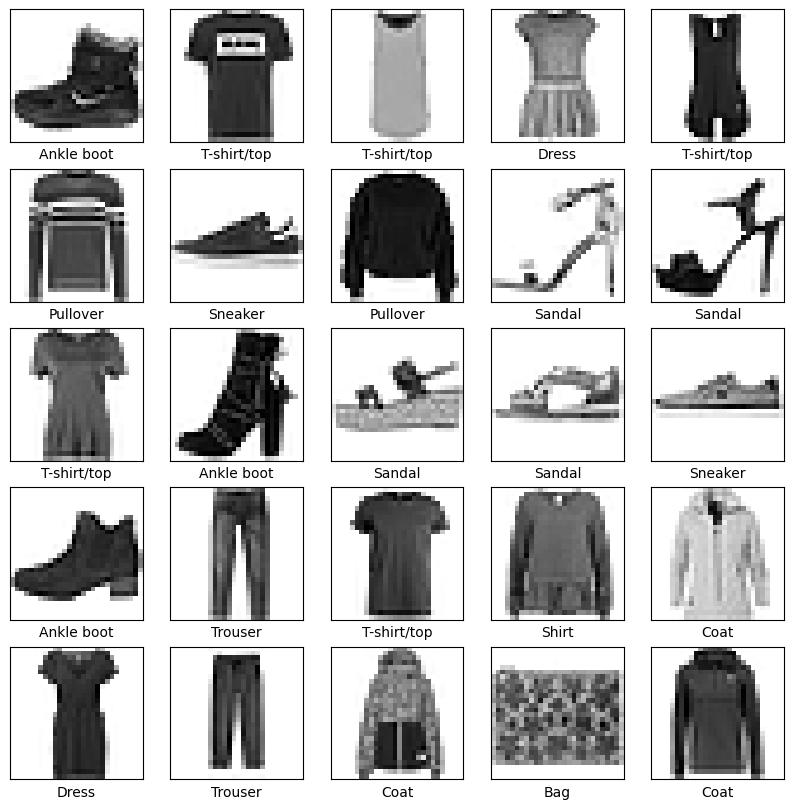

In [2]:
############### SETUP TF (IGNORE) #################
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow.compat.v1 as tf
tf.enable_eager_execution()
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Helper plot function
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Helper plot function
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


############### LOAD DATA SETS #################
# Load images from: https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/
# It is already split into training and test (validation) sets
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# The 9 output classes for the input images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# It is good practice for NNs to input to 0..1 (here pixel intensity 0..255)
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Size of training set input tensor: ", train_images.shape, " outputs: ", train_labels.shape)

# Display first 25 images and corresponding class label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


### Define Model and Loss Function (Resets All Parameters)
Here we use Keras instead to easily define a neural network with two hidden RelU layers, and soft-max output layer for 10 classes. The RelU is just a simplified sigmoid activation function, and soft-max is a generalization of the logistic function for when you have more than two labels (c.f.  slides+book). Neurons in these layers are standard fully-connected to the next layer, in Keras called "Dense" layers, with 128 neurons each.

The model is then compiled into a graph for easy training, using the ADAM optimizer (a variant of stochastic gradient descent).

In [3]:
# Define model using tf.keras layer abstractions
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Turn 28x28 image array into input vector X
    keras.layers.Dense(128, activation=tf.nn.relu),  # Dense = Fully connected layer w/ 128 neurons
    keras.layers.Dense(128, activation=tf.nn.relu),  # Dense = Fully connected layer w/ 128 neurons
    keras.layers.Dense(10, activation=tf.nn.softmax)  # Softmax is a sigmoid normalized for multiple classes
])

# Set loss function (like logistic regression but for multiple output classes),
# and type of stochastic gradient optimizer (ADAM).
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Just for printing progress

# Reshape data for NN input layer (ignore)
train_images = np.squeeze(train_images)
test_images = np.squeeze(test_images)

# Print model information
model.summary()
print("Model and loss defined, parameters reset to small values.")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model and loss defined, parameters reset to small values.


A summary of the model is printed above. While our previous linear model had two parameters, this one has a total of 118 282!

With the above summary and model definition in mind, answer the question below.

**Question 2)** *Show the math for why the first Dense layer has 100 480 parameters with these inputs and number of neurons. Remember, a neuron is just a non-linear transformation (e.g. sigmoid/ReLU) of a **linear model**, implying one parameter for each input dimension, + 1 for the line intercept/constant (also called neuron "bias" in NN slides from the first ML lecture).*
### Train Model in Tensorflow (run several times to train more)
Below we train the NN we defined with Keras above. Here we use the convenient model.fit() from Keras, which does the entire training with gradient descent updates for us, similar to how you did manually above. This uses *stochastic* gradient descent, where mini-batches of training examples are used in each gradient computation instead of the entire training set. This can produce much faster training. The number of epochs is the number of sweeps over the data set using mini-batches. It is identical to pressing play several times, so you can leave that at one. One epoch with a batch size of e.g. 100 on a training set size of 60 000 results in 600 (approximative) gradient descent steps instead of one exact gradient step.

After training, on the first line you will see the time for training and the accuracy (% correctly predicted images), as well as the same for evaluating on the test set.

We also graphically show the predictions on the first 25 images in the *test set*, with a gray bar for each class reflecting the probability the NN assigns to the input image being of this class. The bar is colored blue for the actual true class, and red if the network predicts the wrong class as the most likely. As we train more (run more times) we will see that its confidence grows in its predictions.

Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2890 - accuracy: 0.8923
Epoch 2/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2659 - accuracy: 0.9005
Epoch 3/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2529 - accuracy: 0.9059
Epoch 4/20
1200/1200 [==============================] - 5s 5ms/step - loss: 0.2445 - accuracy: 0.9075
Epoch 5/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2338 - accuracy: 0.9126
Epoch 6/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2251 - accuracy: 0.9157
Epoch 7/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2171 - accuracy: 0.9177
Epoch 8/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2115 - accuracy: 0.9202
Epoch 9/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2047 - accuracy: 0.9219
Epoch 10/20
1200/1200 [==============================] - 5s 5ms/step - loss: 0.198

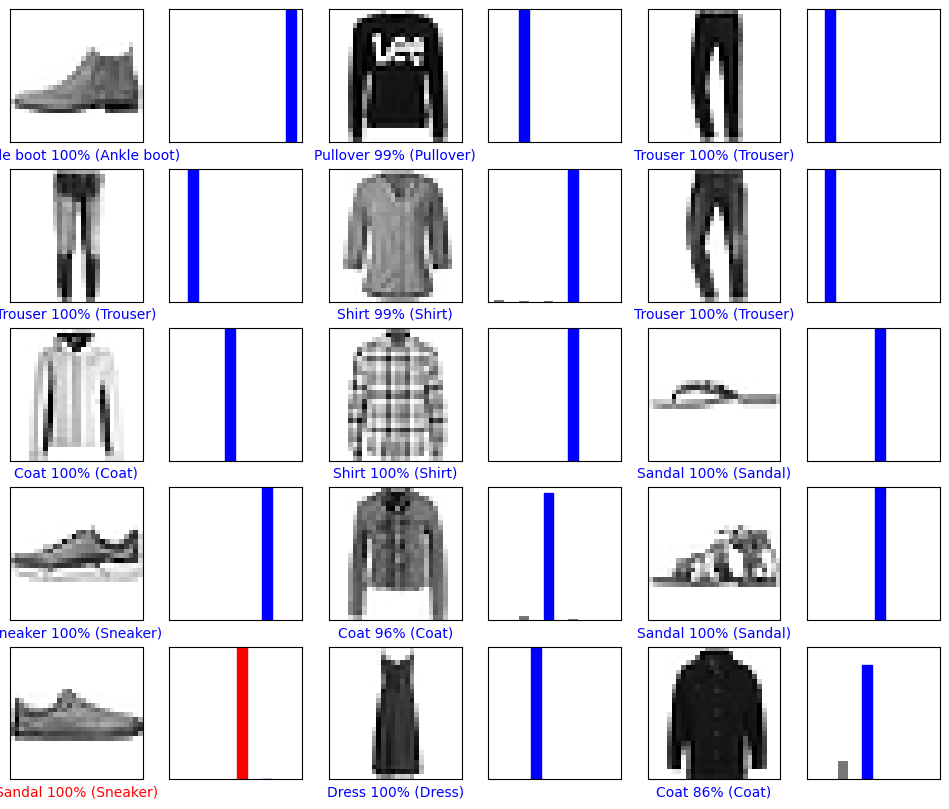

In [7]:
# Train model using Tensorflow
model.fit(train_images, train_labels, epochs=20, batch_size=50)

# Compute accuracy (% correctly classified) on test/validation set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Manually make predictions to visually inspect predictions on test set
predictions = model.predict(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

**Question 3** *Here you will evaluate different mini-bach sizes for stochastic gradient descent (see the deep learning lecture). Please separately run the training code above with batch sizes of 1, 10, 100, 1000 and 60000. Write down the training times (you can use the first number in seconds, not the per sample time) and the training set accuracy reached, both in the first line of the output. This can randomly vary a bit between runs but it should give you an idea. In your lab report, plot both curves and reason about which batch size produced the most accuracy given the time spent, i.e. which batch size would be best to start the training with? You  have to run the Reset All Parameters code above this one between your runs to always start over.*

You have now done the obligatory part of the lab, please turn in a short lab report with answer to the three questions above to your lab assistant.

### Optional Extension: Convolutional Neural Network (Better for Images)
Here we will try CNNs for the same problem. They are actually not suited for these small low-resolution image recognition problems, but you should be able to get 1-2% better test set accuracy. Perhaps more with tweaks. Here we see the true benefit of Keras, being able to mix different types of convolutional layers with ease (see lecture on deep learning). You can train it by running the same training code above, **however use batch sizes <= 100, otherwise you may run out of memory and the instance will restart (you have to re-run the setup code at the start of Part 3).**

We also recommend that you try running this with GPU acceleration. Everything we have done so far has been small enough to run as fast or faster on a CPU, but it is possible to use GPUs for free in CoLab, however they are not the fastest and of limited availability. You can try running this network first like normal, then by using GPU hardware acceleration under Edit->Notebook Settings (NOTE: TPU also exists, but requires custom code). **After switching between CPU/GPU you need to re-run the setup code at the start of Part 3**. If you make changes to the architecture below, not that they can increase the running time by a lot.

#### Define CNN Model Instead (overwrites previous)

In [ ]:
# Define CNN model
model = keras.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=8, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Set loss function (like logistic regression but for multiple output classes),
# and type of stochastic gradient optimizer (ADAM).
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape input data for the CNN, from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# Print model information
model.summary()
print("Model and loss defined, parameters reset to small values.")
print("Ready for training (run cell above)")

## Going From Here
The aim of this lab was to give you a short overview of how Tensorflow and Deep Learning works in practice (don't forget to turn in the questions!). However, if you want to dig deeper, there is plenty of material freely available. This includes academic materials like Stanford's course on Convolutional Neural Networks (http://cs231n.stanford.edu/) and a deep learning book by Goodfellow et al (http://www.deeplearningbook.org/). There are also plenty of more applied takes on the subject, like this one from fast.ai: https://course.fast.ai/.

